In [648]:
import numpy as np
import matplotlib.pyplot as plt
import quandl
import pandas as pd

In [649]:
quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
names_of_company =['HBL','ABL', 'UBL', 'BOP']

results = pd.DataFrame()

for names in names_of_company:
    x = quandl.get('PSX/%s' %names, start_date='2011-1-1',
    end_date='2021-7-30')
    x['company'] = names
    results = results.append(x)


C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\621505836.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\621505836.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\621505836.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)
C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\621505836.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)


,Open,High,Low,Turnover,Close,company
Date,,,,,,
2011-01-03,121.94,121.00,116.80,510969.0,121.94,HBL
2011-01-04,119.49,122.30,119.50,627959.0,119.49,HBL
2011-01-05,121.87,126.45,121.40,1506848.0,121.87,HBL
2011-01-06,124.93,125.89,123.75,773913.0,124.93,HBL
2011-01-07,124.98,126.06,124.69,376749.0,124.98,HBL
...,...,...,...,...,...,...
2021-07-26,8.26,8.35,8.17,1538000.0,8.21,BOP
2021-07-27,8.25,8.60,8.20,10885500.0,8.41,BOP
2021-07-28,8.48,8.48,8.25,2241000.0,8.28,BOP


# Question NO 1

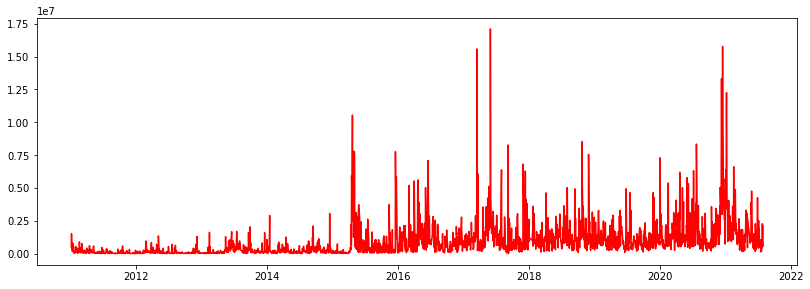

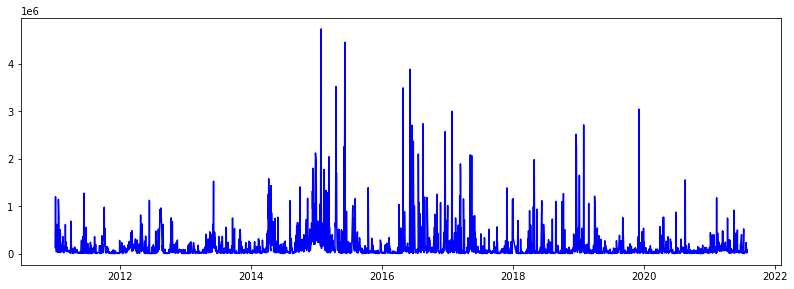

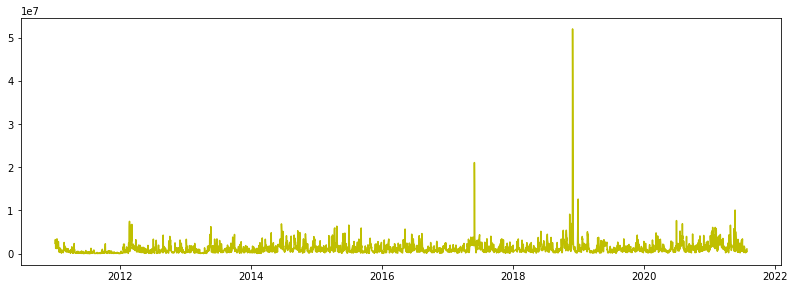

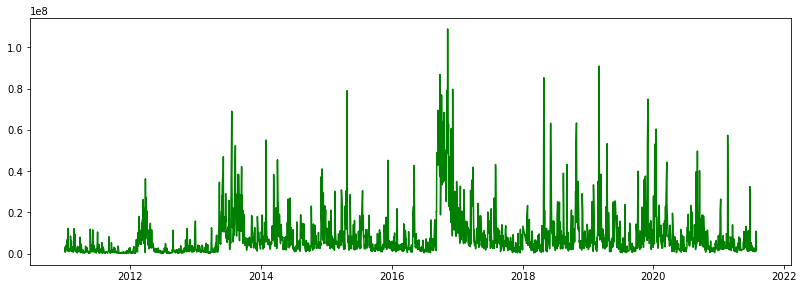

In [650]:


HBL=results.loc[results['company']=='HBL','Turnover']
ABL=results.loc[results['company']=='ABL','Turnover']
UBL=results.loc[results['company']=='UBL','Turnover']
BOP=results.loc[results['company']=='BOP','Turnover']
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)

plt.plot(HBL, c='r')


plt.figure(figsize=(30,10))
plt.subplot(2,2,2)

plt.plot(ABL, c='b')

plt.figure(figsize=(30,10))

plt.subplot(2,2,3)

plt.plot(UBL, c='y')

plt.figure(figsize=(30,10))

plt.subplot(2,2,4)

plt.plot(BOP, c='g')

plt.show()

# Question 2

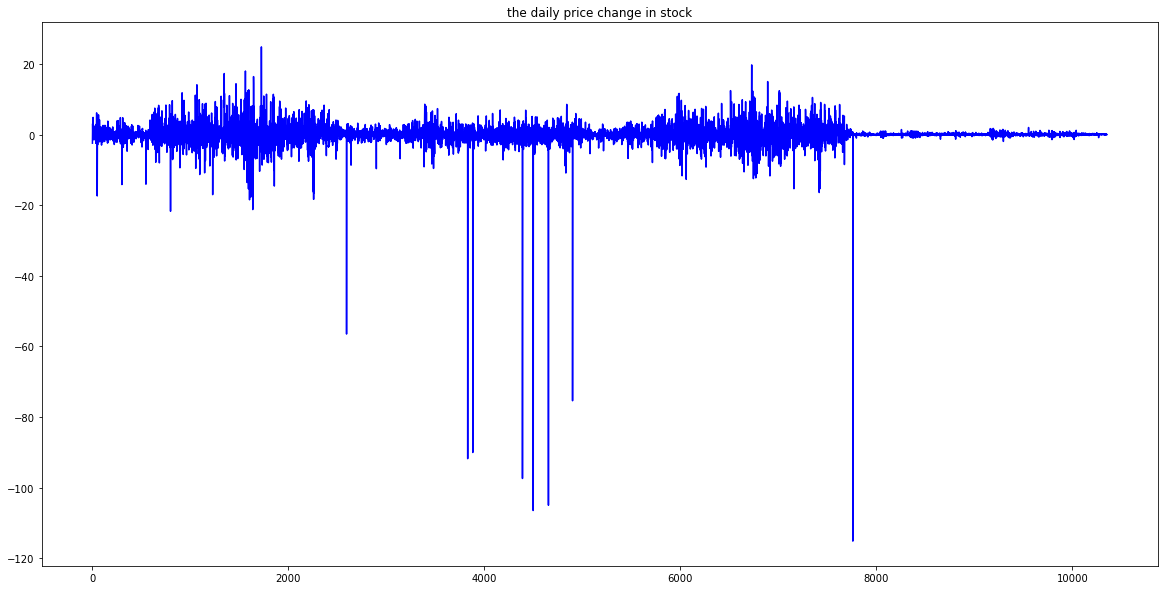

In [651]:
newList=[]
for i in range(len(results)-1):  
    newList.append(results.iloc[1:,0][i]-results.iloc[0:,4][i])
plt.figure(figsize=(20,10))
plt.title('the daily price change in stock')

plt.plot(newList,color='blue')

# Question 3

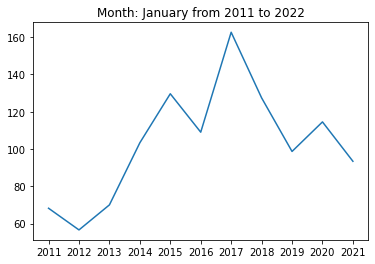

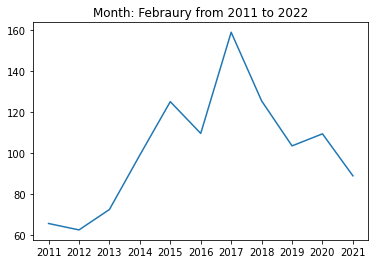

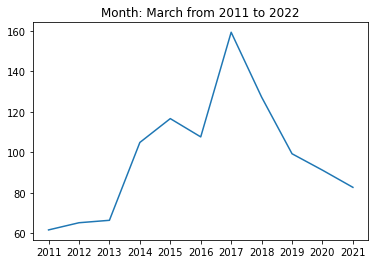

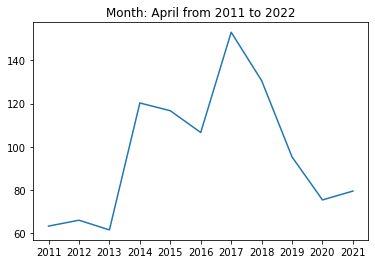

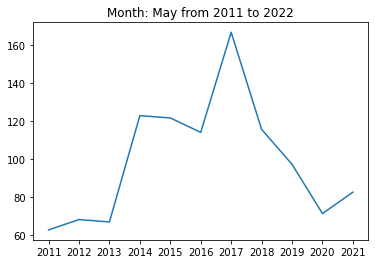

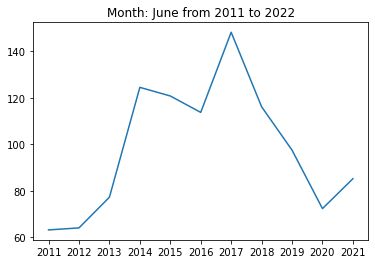

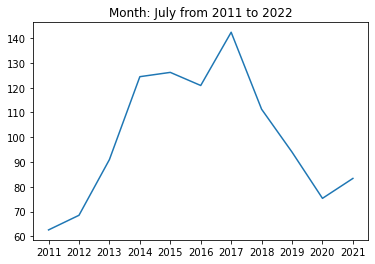

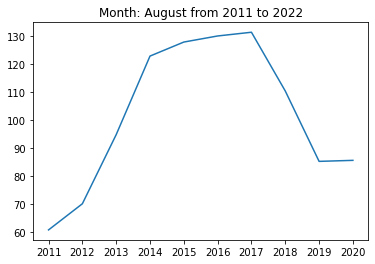

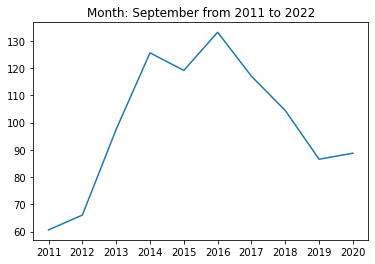

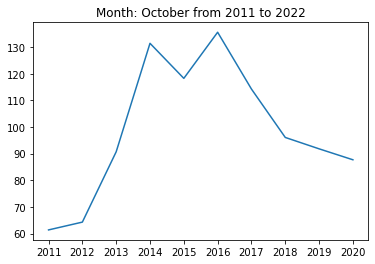

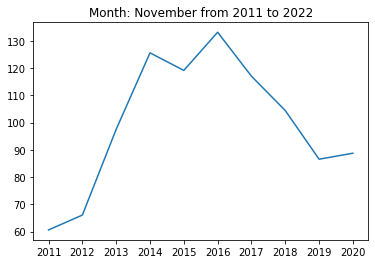

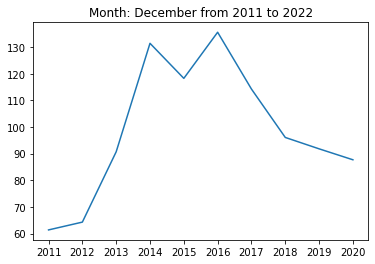

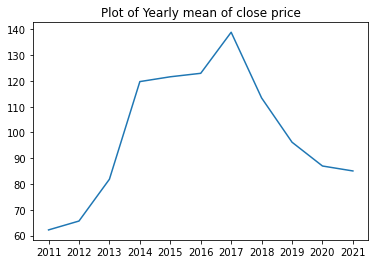

In [652]:
results['date']=results.index
x= pd.DataFrame( columns=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] )
x['Months']=[1,2,3,4,5,6,7,8,9,10,11,12]
x.index=x['Months']
x=x.drop('Months',axis=1)
for year in x.columns:
    for month in x.index:
        x.loc[month][year]=results[(results['date'] > year+'-'+str(month)+'-01') &  (results['date'] <=  year+'-'+str(month)+'-28')]['Close'].mean()
x.fillna(0)
plt.title('Month: January from 2011 to 2022')
plt.plot(x.loc[1])
plt.show()
plt.title('Month: Febraury from 2011 to 2022')
plt.plot(x.loc[2])
plt.show()
plt.title('Month: March from 2011 to 2022')
plt.plot(x.loc[3])
plt.show()
plt.title('Month: April from 2011 to 2022')
plt.plot(x.loc[4])
plt.show()
plt.title('Month: May from 2011 to 2022')
plt.plot(x.loc[5])
plt.show()
plt.title('Month: June from 2011 to 2022')
plt.plot(x.loc[6])
plt.show()
plt.title('Month: July from 2011 to 2022')
plt.plot(x.loc[7])
plt.show()
plt.title('Month: August from 2011 to 2022')
plt.plot(x.loc[8])
plt.show()
plt.title('Month: September from 2011 to 2022')
plt.plot(x.loc[9])
plt.show()
plt.title('Month: October from 2011 to 2022')
plt.plot(x.loc[10])
plt.show()
plt.title('Month: November from 2011 to 2022')
plt.plot(x.loc[9])
plt.show()
plt.title('Month: December from 2011 to 2022')
plt.plot(x.loc[10])
plt.show()
duplicate=x.copy()
duplicate.loc['13']=[0,0,0,0,0,0,0,0,0,0,0]
for year in x.columns:
    duplicate.loc['13'][year]=x[year].mean()
plt.title('Plot of Yearly mean of close price')
plt.plot(duplicate.loc['13'])

# Question 4

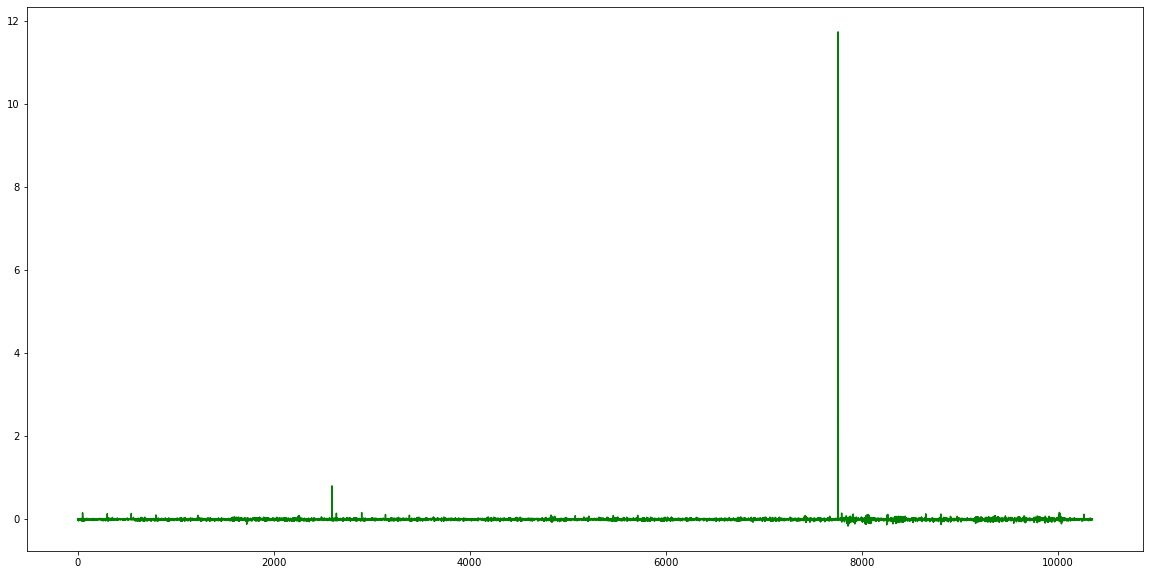

In [653]:
newList=[]
for i in range(len(results)-1):  
    newList.append((results.iloc[0:,4][i]/results.iloc[1:,4][i])-1)
newList.insert(0, 0)
results['Daily_Return']=newList
plt.figure(figsize=(20,10))
plt.plot(newList,color='green')

# Question 5

In [654]:

HBL=results[results['company']=='HBL']
ABL=results[results['company']=='ABL']
UBL=results[results['company']=='UBL']
BOP=results[results['company']=='BOP']

print('HBLs best single day returns',HBL[HBL['Daily_Return']==HBL['Daily_Return'].max()].index)
print('HBLs worst single day returns',HBL[HBL['Daily_Return']==HBL['Daily_Return'].min()].index)

print('ABLs best single day returns',ABL[ABL['Daily_Return']==ABL['Daily_Return'].max()].index)
print('ABLs worst single day returns',ABL[ABL['Daily_Return']==ABL['Daily_Return'].min()].index)

print('UBLs best single day returns',UBL[UBL['Daily_Return']==UBL['Daily_Return'].max()].index)
print('UBLs worst single day returns',UBL[UBL['Daily_Return']==UBL['Daily_Return'].min()].index)

print('BOPs best single day returns',BOP[BOP['Daily_Return']==BOP['Daily_Return'].max()].index)
print('BOPs worst single day returns',BOP[BOP['Daily_Return']==BOP['Daily_Return'].min()].index)

HBLs best single day returns DatetimeIndex(['2011-03-15'], dtype='datetime64[ns]', name='Date', freq=None)
HBLs worst single day returns DatetimeIndex(['2018-01-19'], dtype='datetime64[ns]', name='Date', freq=None)
ABLs best single day returns DatetimeIndex(['2011-01-03'], dtype='datetime64[ns]', name='Date', freq=None)
ABLs worst single day returns DatetimeIndex(['2020-04-03'], dtype='datetime64[ns]', name='Date', freq=None)
UBLs best single day returns DatetimeIndex(['2013-03-19'], dtype='datetime64[ns]', name='Date', freq=None)
UBLs worst single day returns DatetimeIndex(['2020-06-03'], dtype='datetime64[ns]', name='Date', freq=None)
BOPs best single day returns DatetimeIndex(['2011-01-03'], dtype='datetime64[ns]', name='Date', freq=None)
BOPs worst single day returns DatetimeIndex(['2011-05-26'], dtype='datetime64[ns]', name='Date', freq=None)


# Question 6

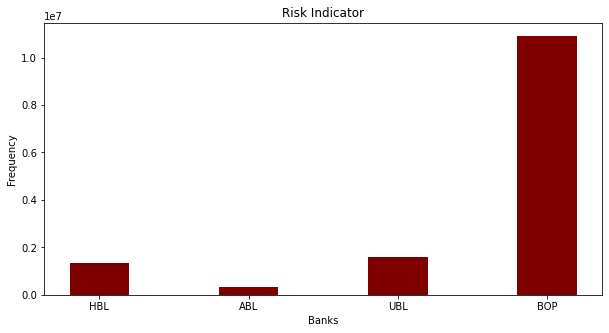

In [655]:

data={'HBL':HBL['Turnover'].std(),'ABL':ABL['Turnover'].std(),'UBL':UBL['Turnover'].std(),'BOP':BOP['Turnover'].std()}
Banks = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Banks, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Banks")
plt.ylabel("Frequency")
plt.title("Risk Indicator")
plt.show()


# Question 7

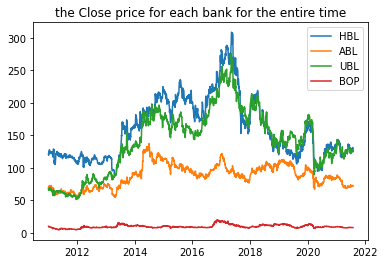

In [656]:
plt.plot(HBL['Close'],label='HBL')
plt.plot(ABL['Close'],label='ABL')
plt.plot(UBL['Close'],label='UBL')
plt.plot(BOP['Close'],label='BOP')
plt.legend()
plt.title("the Close price for each bank for the entire time")
plt.show()


# Question 8

C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\2046766953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HBL['Flux']=newList


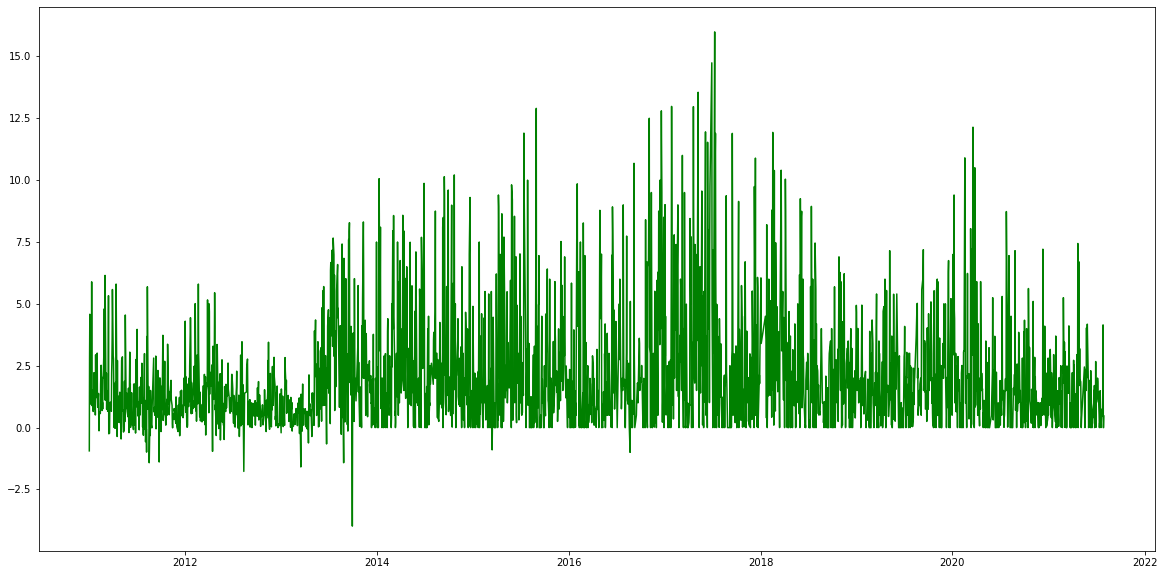

In [657]:
newList=[]
for i in range(len(HBL)):  
    newList.append((HBL.iloc[0:,1][i]-HBL.iloc[0:,0][i]))
HBL['Flux']=newList
plt.figure(figsize=(20,10))
plt.plot(HBL['Flux'],color='green')


# Finding 1
#Max liquidity or fluctuations in HBLs stock was in 2017 - 2018
#HBLs Stock market crashed at its worst in  2013-2014

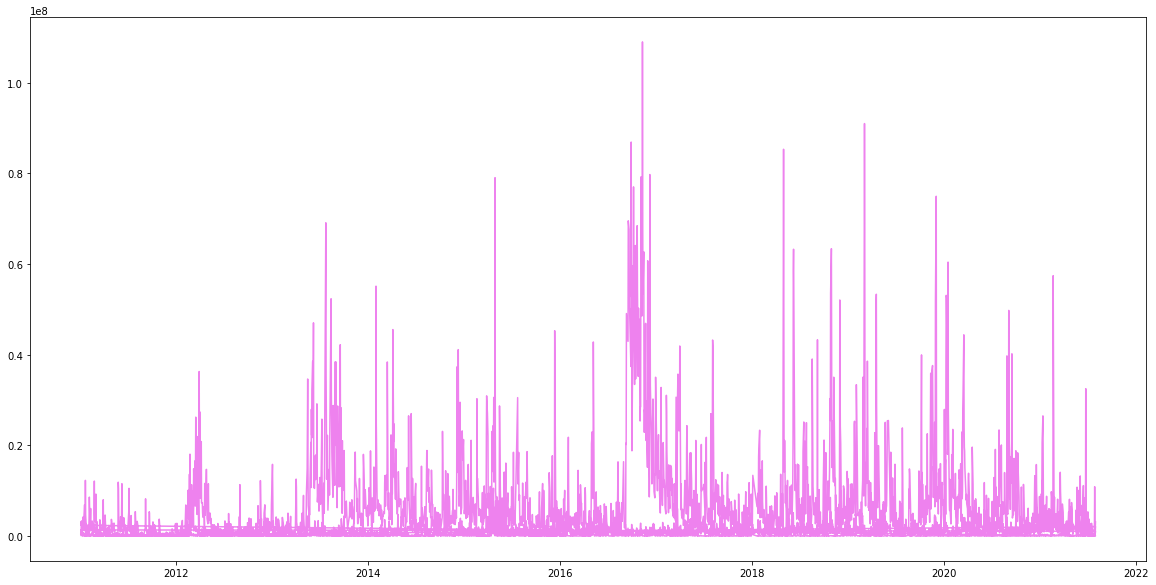

In [658]:
plt.figure(figsize=(20,10))
plt.plot(results['Turnover'],color='violet')

# Finding 2
Stock turnover rate is considered to be a measure of sales performance; usually the higher the stock turnover rate, the better your stock/business is performing.
its greater between 2016-2018

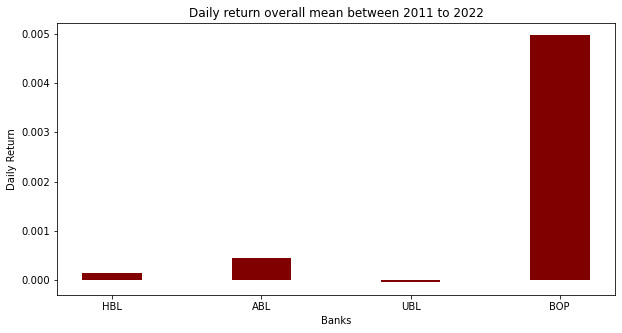

In [659]:
data={'HBL':HBL['Daily_Return'].mean(),'ABL':ABL['Daily_Return'].mean(),'UBL':UBL['Daily_Return'].mean(),'BOP':BOP['Daily_Return'].mean()}
Banks = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Banks, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Banks")
plt.ylabel("Daily Return")
plt.title("Daily return overall mean between 2011 to 2022")
plt.show()


# Finding 3
BOP is more profitable so far